# **Churn Customer Prediction for BAU Graduation Project**
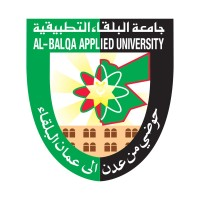

In the fast-paced and competitive landscape of the modern business world, customer retention has become a critical aspect of sustaining a successful enterprise. As businesses strive to provide exceptional services, understanding and predicting customer churn – the phenomenon where customers discontinue their engagement with a company – has emerged as a pivotal challenge. The ability to identify potential churners in advance empowers businesses to implement targeted strategies for customer retention and maintain a robust, loyal customer base.

For my graduation project at Balqa Applied University, I have undertaken a comprehensive study and implementation of a Churn Customer Prediction system. This project is designed to address the real-world challenges faced by businesses in minimizing customer attrition. By leveraging advanced data analytics and machine learning techniques, I aim to develop a predictive model capable of identifying patterns and indicators associated with potential customer churn.

The project encompasses various stages, including data preprocessing, exploratory data analysis, feature engineering, and the application of machine learning algorithms. Additionally, I will assess the performance of different models, such as Support Vector Machines, Decision Trees, and XGBoost, to determine the most effective approach for our specific dataset.

Through this endeavor, I aim to contribute valuable insights and practical solutions to the field of customer relationship management. The implications of successfully predicting customer churn extend beyond business profitability, impacting customer satisfaction and brand reputation.

I am excited to embark on this journey, exploring the intricate dynamics of customer behavior and developing a predictive tool that could potentially revolutionize how businesses approach customer retention. As I progress through this project, I anticipate gaining a deeper understanding of the practical applications of data science and machine learning in a business context.

I look forward to sharing the outcomes of my research and contributing to the academic and practical knowledge base in the domain of customer churn prediction.



# **Library Install**

In [1]:
pip install imblearn


In [2]:
pip install xgboost

In [3]:
pip install folium

In [4]:
pip install imbalanced-learn

In [5]:
pip install h3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.4 MB/s eta 0:00:00


# **Library Import**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import chi2,f_classif,SelectKBest
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import StackingClassifier

In [7]:
data = pd.read_excel('/content/ChurnTrue.xlsx')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [9]:
data.shape

(7043, 33)

In [10]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

# **Checking for missing values**

1) Change the data type for the "Total Charges" column from object to numeric (assuming money is represented as a number)

In [11]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

2) Check if we have some missing values in our dataset

In [12]:
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

The Churn Reason has many missing values because not all of our customers are in the churn:

In [13]:
data.groupby('Churn Label')['CustomerID'].nunique()

Churn Label
No     5174
Yes    1869
Name: CustomerID, dtype: int64

5184 customers have a Churn Label = No, so they no need to have some Churn Reason. It is fine.
<div>But what about Total Charges?</div>

In [14]:
data[data['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


We see that all clients for which there is no 'Total Charges' value are not in the churn, and also almost all of them have the same contract type - 'Two years', and one customer has 'One Year' contract.

<a id="3"></a>
## Replacing missing values

We can delete these 11 rows from the dataset and continue working, but can we just delete the data without trying other options?
<div> No! </div>

In our dataset, we have the number of months that the customer uses the service (Tenure Months), as well as his monthly payments (Monthly Charges).
<div> Let's check if we can replace these values with those calculated through monthly charges.</div>
We know how many months customer is using service, so we can check if calulation : monthly charges * tenure months will have result equal to total charges value.
<div> Lrt's try it!

1) Calculating charges:

In [15]:
data['calc_charges'] = data['Monthly Charges'] * data['Tenure Months']

2) calculating difference between Total Charges and calculated charges

In [16]:
data['diff_in_charges'] = data['Total Charges'] - data['calc_charges']

Let's check if our idea is working!

In [17]:
data.groupby('Contract')[['Total Charges','diff_in_charges']].quantile([.50,.80,.90,.95])

Total Charges  diff_in_charges
Contract                                           
Month-to-month 0.50       679.5500           0.0000
               0.80      2485.7300          24.8100
               0.90      3844.0600          54.0200
               0.95      4966.9200          85.3300
One year       0.50      2657.5500           0.7750
               0.80      5286.4600          55.0500
               0.90      6341.2500          92.2000
               0.95      7072.4725         133.3375
Two year       0.50      3623.9500           0.5000
               0.80      6399.2400          61.5300
               0.90      7457.6100          97.5700
               0.95      7922.3400         139.1800

We can see that for 95 percent of customers the difference is less than 10% of the median total charges. In this case, it seems possible to replace the missing values of total charges with those calculated in terms of monthly charges and not delete these rows.

In [18]:
data['Total Charges'] = np.where(data['Total Charges'].isna() == True,data['calc_charges'], data['Total Charges'])

In [19]:
data = data.drop(['calc_charges','diff_in_charges'], axis=1)

We have solved the problem of missing values, now we can start analyzing data about our customers.

# **Preparing data for the model**

<a id="19"></a>
## 1) deleting the columns that we won't use

In [20]:
data = data.drop(['Country','State','Count','Zip Code','Churn Reason','City','Churn Score','Churn Value','CLTV','CustomerID','Lat Long',
                  'Latitude','Longitude'], axis = 1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure Months,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
Monthly Charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
Total Charges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


<a id="20"></a>
## 2)Changing categorical variables to numeric:

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
Gender  :  [1 0]  =  ['Male' 'Female']
Senior Citizen  :  [0 1]  =  ['No' 'Yes']
Partner  :  [0 1]  =  ['No' 'Yes']
Dependents  :  [0 1]  =  ['No' 'Yes']
Phone Service  :  [1 0]  =  ['Yes' 'No']
Multiple Lines  :  [0 2 1]  =  ['No' 'Yes' 'No phone service']
Internet Service  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
Online Security  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Online Backup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Device Protection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Tech Support  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming TV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming Movies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 2 1]  =  ['Month-to-month' 'Two year' 'One year']
Paperless Billing  :  [1 0]  =  ['Yes' 'No']
Payment Method  :  [3 2 0 1]  =  ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Label  :  [1 0]

In [24]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Gender Senior Citizen Partner Dependents Phone Service Multiple Lines Internet Service Online Security Online Backup Device Protection Tech Support Streaming TV Streaming Movies Contract Paperless Billing Payment Method Churn Label
Numerical Features : Tenure Months Monthly Charges Total Charges


In [25]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Tenure Months'] = mms.fit_transform(df1[['Tenure Months']])
df1['Monthly Charges'] = mms.fit_transform(df1[['Monthly Charges']])
df1['Total Charges'] = mms.fit_transform(df1[['Total Charges']])
df1.tail(10)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
7033,0,0,0,0,0.027778,1,0,2,1,1,1,1,1,1,0,1,3,0.017910,0.004519,0
7034,1,1,1,0,0.763889,1,2,0,2,2,0,0,0,0,1,0,1,0.415423,0.381828,0
7035,1,0,0,0,0.527778,1,0,1,0,0,0,0,0,0,0,1,1,0.509950,0.302281,0
7036,1,0,0,0,0.263889,1,0,1,0,0,0,0,2,0,0,1,0,0.601493,0.172151,0
7037,0,0,0,0,0.166667,0,1,0,0,2,2,2,2,2,1,0,2,0.421891,0.085586,0
7038,0,0,0,0,1.000000,1,0,2,1,1,1,1,1,1,2,1,0,0.028856,0.163435,0
7039,1,0,1,1,0.333333,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.229194,0
7040,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847792,0
7041,0,0,1,1,0.152778,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.039892,0
7042,1,0,0,0,0.916667,1,0,1,2,0,2,2,2,2,2,1,0,0.869652,0.788101,0


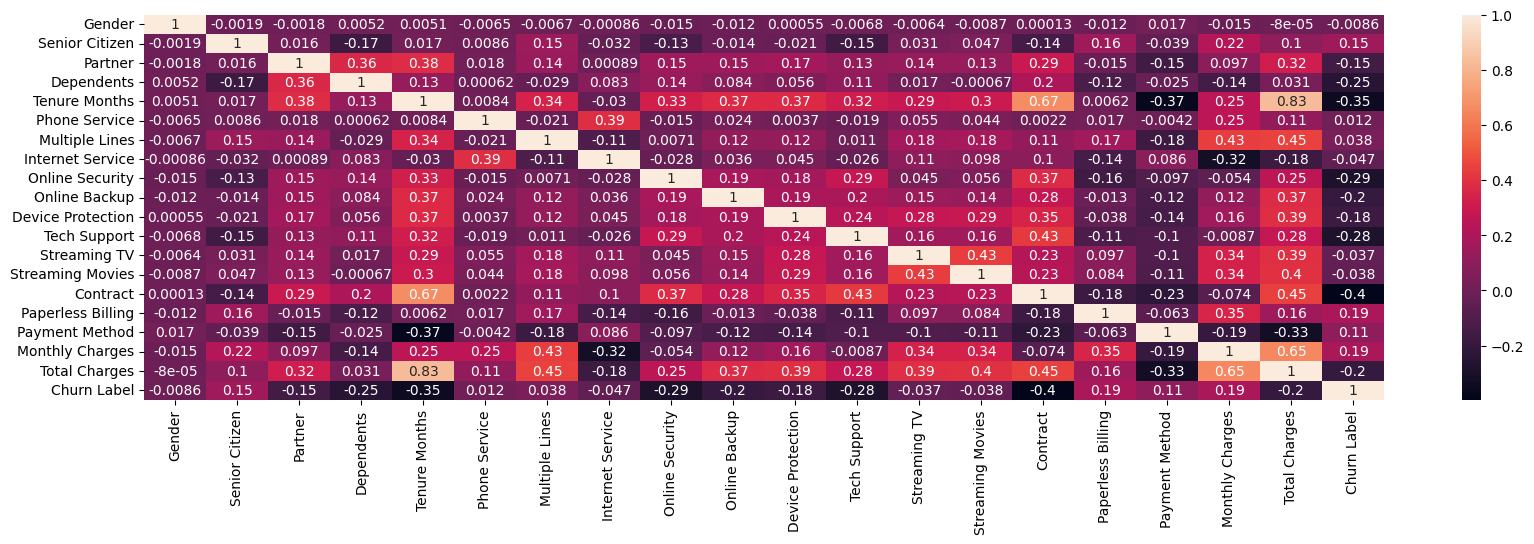

In [26]:
import seaborn as sns

# Assuming df1 is your DataFrame
plt.figure(figsize=(20, 5))
sns.heatmap(df1.corr(), annot=True)
plt.show()


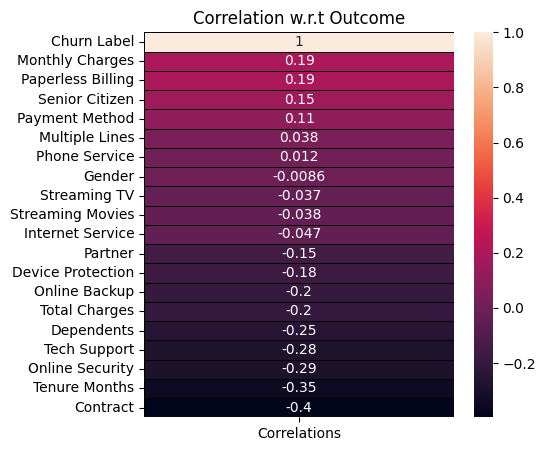

In [27]:
corr = df1.corrwith(df1['Churn Label']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

# **Feature selection**

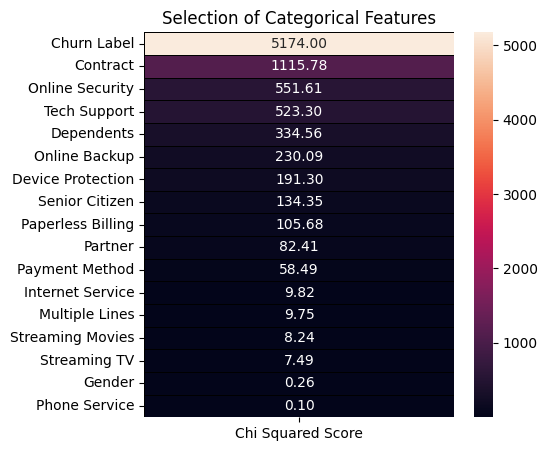

In [28]:
features = df1.loc[:,categorical_features]
target = df1.loc[:,'Churn Label']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

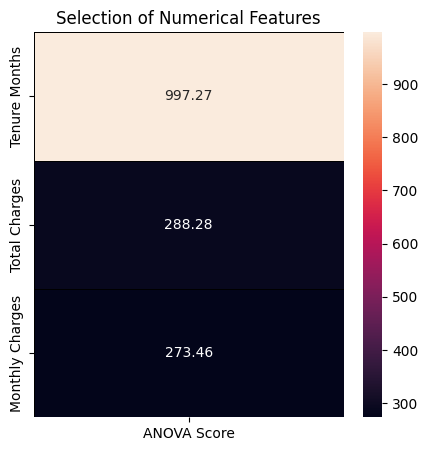

In [29]:
features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn Label']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [30]:
df1.drop(columns = ['Phone Service', 'Gender','Streaming TV','Streaming Movies','Multiple Lines','Internet Service'],inplace = True)
df1.head()


,Senior Citizen,Partner,Dependents,Tenure Months,Online Security,Online Backup,Device Protection,Tech Support,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,0,0,0,0.027778,2,2,0,0,0,1,3,0.354229,0.012453,1
1,0,0,1,0.027778,0,0,0,0,0,1,2,0.521891,0.017462,1
2,0,0,1,0.111111,0,0,2,0,0,1,2,0.809950,0.094475,1
3,0,1,1,0.388889,0,0,2,2,0,1,2,0.861194,0.350733,1
4,0,0,1,0.680556,0,2,2,0,0,1,0,0.850249,0.579898,1


<a id="21"></a>
## 3) balancing the data

In [31]:

over = SMOTE(sampling_strategy = 1)

f1 = df1.iloc[:,:13].values
t1 = df1.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)


Counter({1: 5174, 0: 5174})

In [ ]:
data.shape()

# **Build a model**

In [32]:
def plot_roc_curve(fpr, tpr, roc_auc):
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend()
  plt.show()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [34]:
def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

# **1-XGBoost Classifier**

In [35]:
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 5,n_estimators = 1000)

In [36]:
classifier_xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

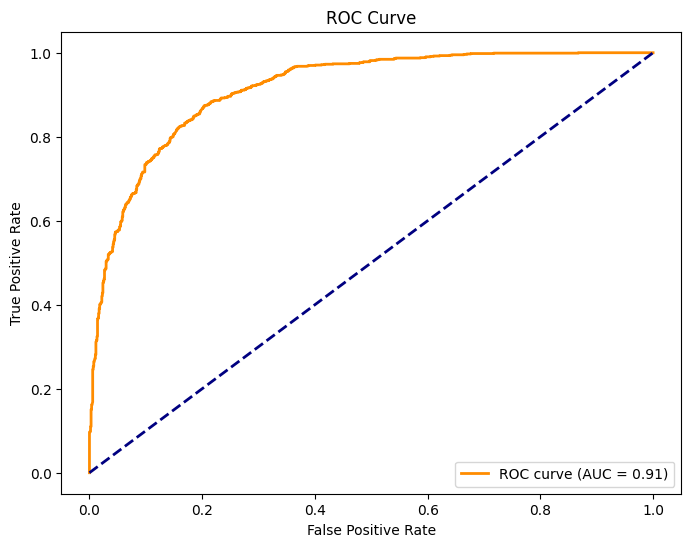

In [37]:
def plot_roc_curve(classifier, x_test, y_test):
    y_score = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Assuming x_test and y_test are your test data
plot_roc_curve(classifier_xgb, x_test, y_test)


              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1049
           1       0.80      0.88      0.84      1021

    accuracy                           0.83      2070
   macro avg       0.84      0.83      0.83      2070
weighted avg       0.84      0.83      0.83      2070



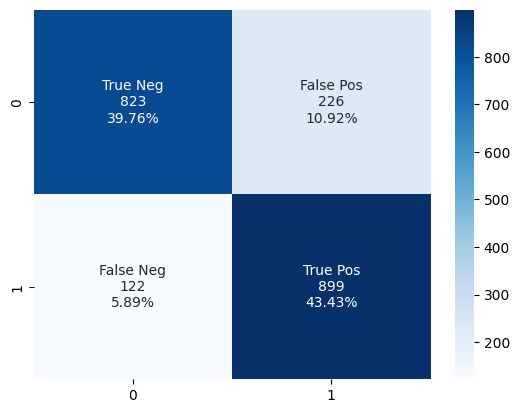

In [38]:
model_evaluation(classifier_xgb,x_test,y_test)

# **2- Random Forest classifier**

In [39]:
classifier_rf = RandomForestClassifier(max_depth = 5,random_state = 33)

Cross Validation Score :  87.90%
ROC_AUC Score :  78.74%


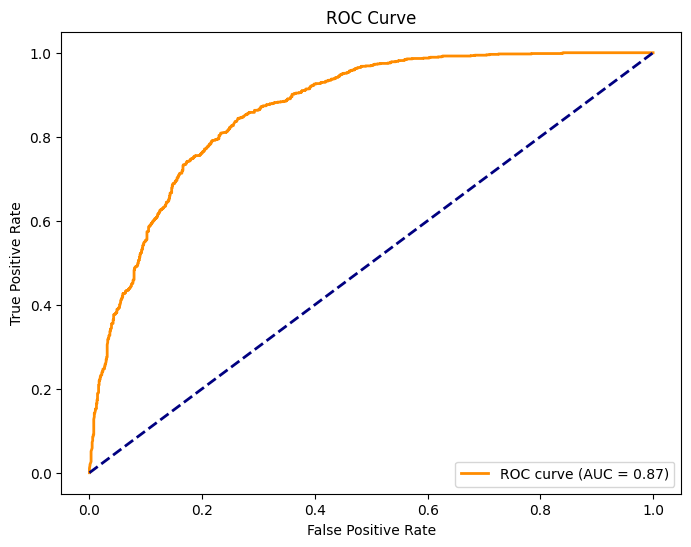

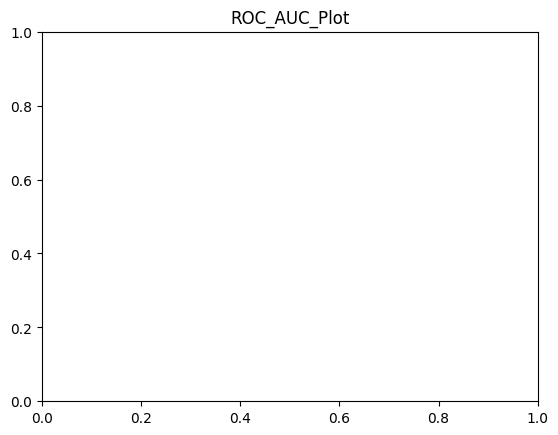

In [40]:
model(classifier_rf,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.84      0.72      0.77      1049
           1       0.75      0.86      0.80      1021

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



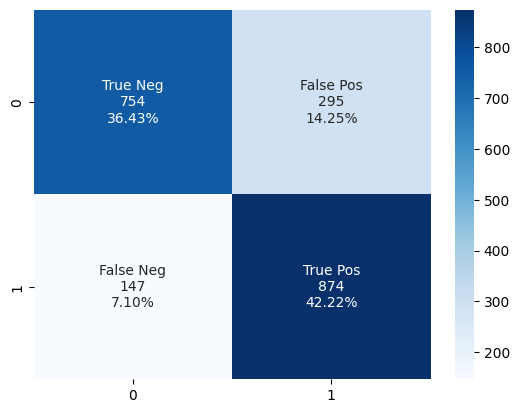

In [41]:
model_evaluation(classifier_rf,x_test,y_test)

# **3- Decision Tree Classifier**

In [42]:
classifier_dt = DecisionTreeClassifier(random_state = 33,max_depth = 5)

Cross Validation Score :  86.64%
ROC_AUC Score :  77.79%


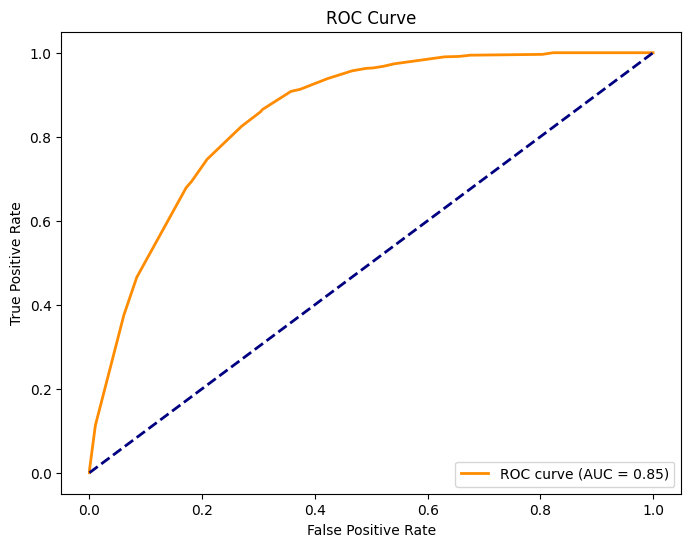

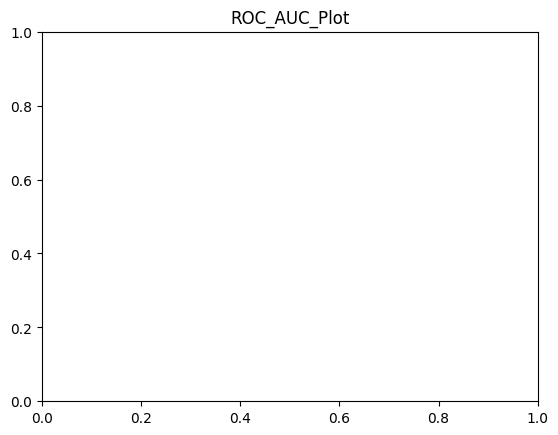

In [43]:
model(classifier_dt,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      1049
           1       0.73      0.86      0.79      1021

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



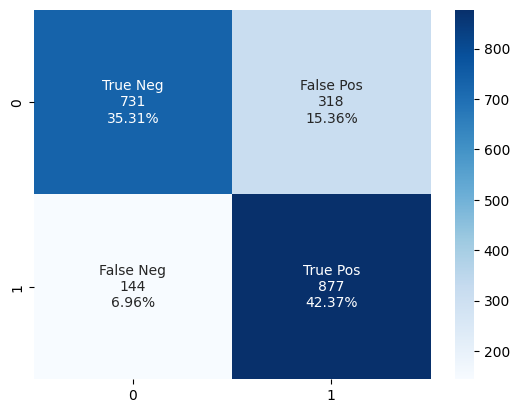

In [44]:
model_evaluation(classifier_dt,x_test,y_test)


# **4-Logistic Regression**

In [45]:
LR = LogisticRegression(random_state = 33)

Cross Validation Score :  86.62%
ROC_AUC Score :  77.80%


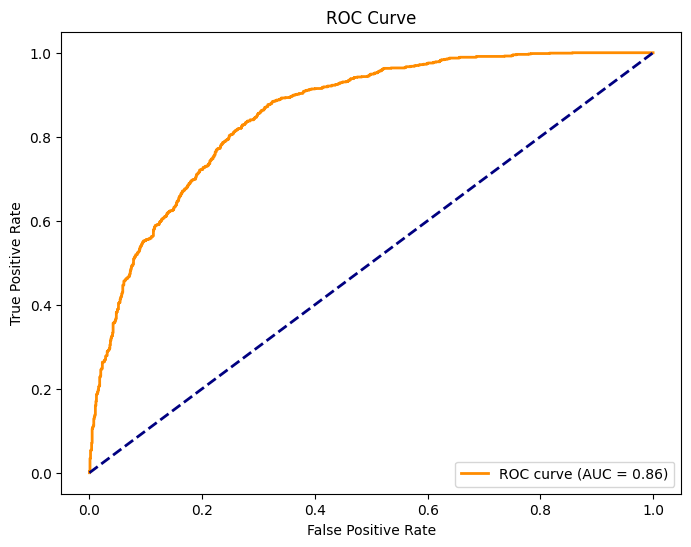

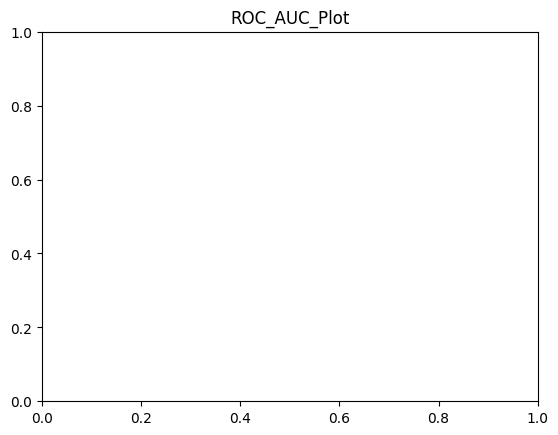

In [46]:
model(LR,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1049
           1       0.75      0.83      0.79      1021

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



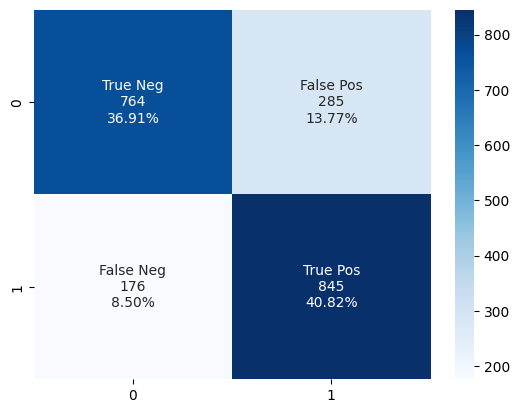

In [47]:
model_evaluation(LR,x_test,y_test)


# **Stacking of classifiers**

In [48]:
stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
                                         ('LR',LR),
                                         ('classifier_rf',classifier_rf),
                                         ('classifier_dt',classifier_dt)],
                           final_estimator = classifier_xgb )

Cross Validation Score :  92.16%
ROC_AUC Score :  83.13%


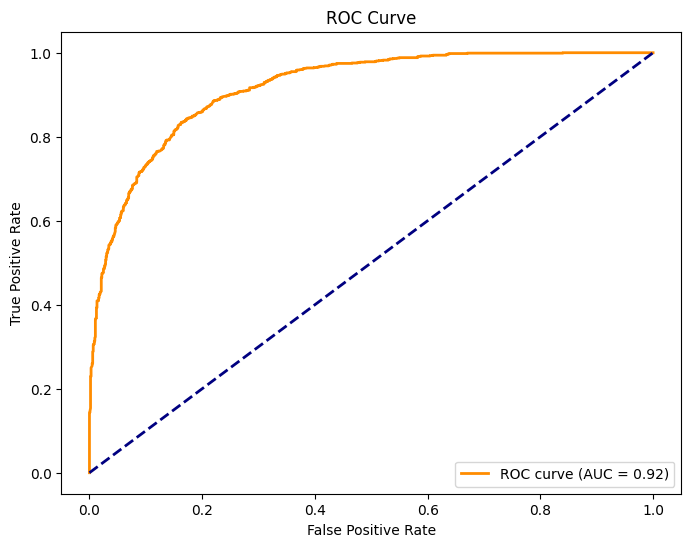

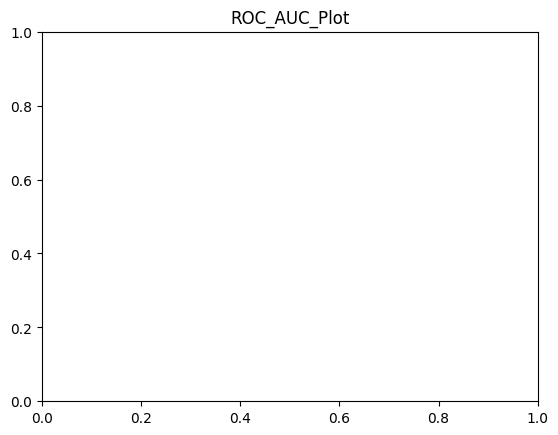

In [49]:
model(stack,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1049
           1       0.81      0.86      0.83      1021

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



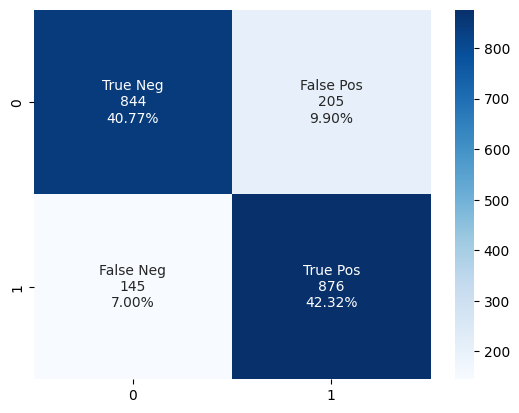

In [50]:
model_evaluation(stack,x_test,y_test)

In [51]:
classifier_xgb = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=1000)
classifier_rf = RandomForestClassifier(max_depth=5, random_state=33)
classifier_dt = DecisionTreeClassifier(random_state=33, max_depth=5)
LR = LogisticRegression(random_state=33)
stack = StackingClassifier(
    estimators=[
        ('classifier_xgb', classifier_xgb),
        ('LR', LR),
        ('classifier_rf', classifier_rf),
        ('classifier_dt', classifier_dt)
    ],
    final_estimator=classifier_xgb
)

data = []

def add_to_data(model_name, classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cross_val = cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()
    roc_auc = roc_auc_score(y_test, prediction)

    data.append([model_name, '{0:.2%}'.format(cross_val), '{0:.2%}'.format(roc_auc)])

add_to_data("XGBClassifier", classifier_xgb, x_train, y_train, x_test, y_test)
add_to_data("RandomForestClassifier", classifier_rf, x_train, y_train, x_test, y_test)
add_to_data("DecisionTreeClassifier", classifier_dt, x_train, y_train, x_test, y_test)
add_to_data("LogisticRegression", LR, x_train, y_train, x_test, y_test)
add_to_data("Stack of Classifiers", stack, x_train, y_train, x_test, y_test)

df = pd.DataFrame(data, columns=["Model", "Cross Validation Score", "ROC AUC Score"])

print(df)


                    Model Cross Validation Score ROC AUC Score
0           XGBClassifier                 92.01%        83.25%
1  RandomForestClassifier                 87.90%        78.74%
2  DecisionTreeClassifier                 86.64%        77.79%
3      LogisticRegression                 86.62%        77.80%
4    Stack of Classifiers                 92.16%        83.13%
